# Example of reproducing HHT analysis results in Su et al. 2015
*  [Su et al. 2015: "Characterizing Intermittency of 4-Hz Quasi-periodic Oscillation in XTE J1550-564 Using Hilbert-Huang Transform"](http://adsabs.harvard.edu/abs/2015ApJ...815...74S)

## Reading the QPO light curve data

In [1]:
from astropy.io import ascii

data = ascii.read('./XTE_J1550_564_30191011500A_2_13kev_001s_0_2505s.txt')
time = data['col1']
rate = data['col2']
dt = time[1] - time[0]

## Running EEMD of the QPO signal and checking the orthogonality of the IMF components

In [2]:
from hhtpywrapper.eemd import EEMD

eemd_post_processing = EEMD(rate, 6.0, 100, num_imf=10, seed_no=4, post_processing=True)
eemd_post_processing.get_oi()

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-cf5bac37-5bb7-4c34-8d5a-45f5dc87dcb5
Send 'exit' command to kill the server
.......MATLAB started and connected!


{'Non-orthogonal leakage for pair of adjoining components': array([[ 0.02047897],
        [ 0.04336774],
        [ 0.02103488],
        [ 0.03351462],
        [ 0.03804759],
        [ 0.030502  ],
        [ 0.02775446],
        [ 0.03185375],
        [ 0.0001296 ]]),
 'Non-orthogonal leakage of components': -0.004343884739367545}

## Reproducing Figure 2 in Su et al. 2015

<IPython.core.display.Javascript object>


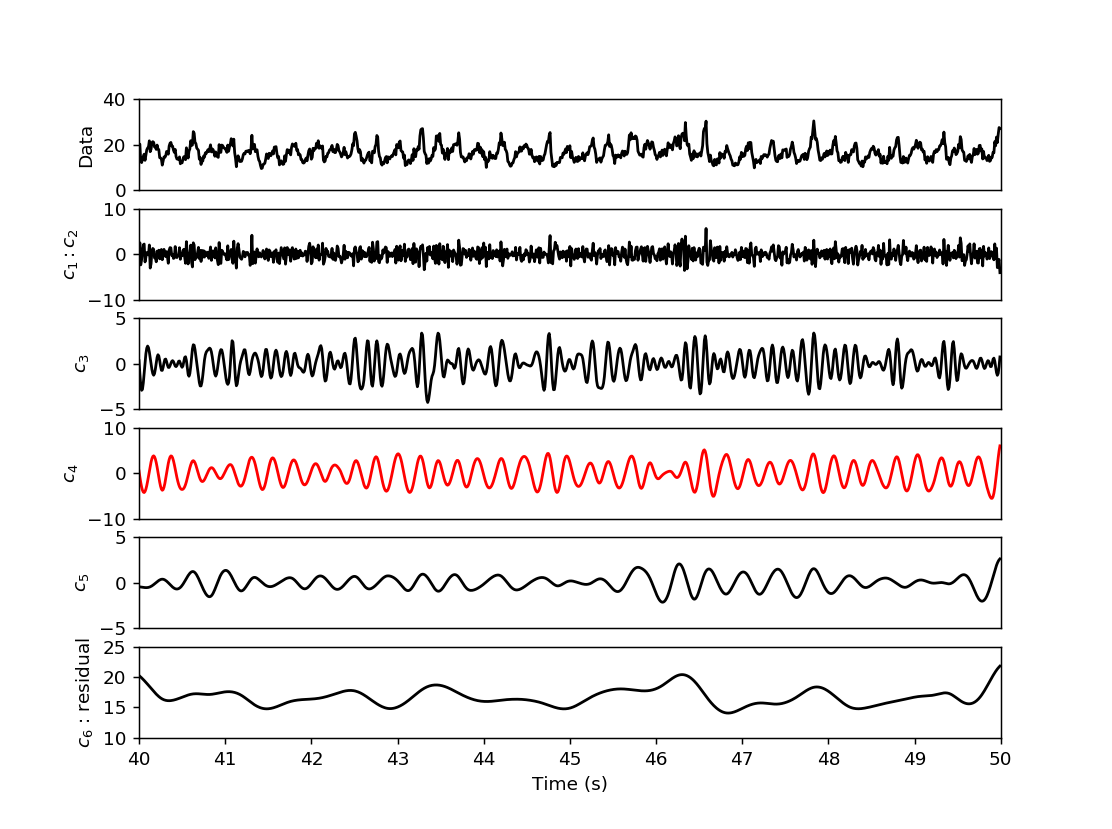

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

tstart = int(np.fix(40 / dt))
tend = int(np.fix(50 / dt))

hi_noise = np.sum(eemd_post_processing.imfs[:,:2], axis=1)
c3 = eemd_post_processing.imfs[:,2]
c4 = eemd_post_processing.imfs[:,3]
c5 = eemd_post_processing.imfs[:,4]
low_noise = np.sum(eemd_post_processing.imfs[:,5:], axis=1)

plt.figure()
plt.subplot(611)
plt.plot(time[tstart:tend], rate[tstart:tend]/1000, 'k')
plt.xticks([])
plt.yticks([0, 20, 40])
plt.xlim([40, 50])
plt.ylabel('Data')
plt.subplot(612)
plt.plot(time[tstart:tend], hi_noise[tstart:tend]/1000, 'k')
plt.xticks([])
plt.yticks([-10, 0, 10])
plt.xlim([40, 50])
plt.ylabel(r'$c_{1} : c_{2}$')
plt.subplot(613)
plt.plot(time[tstart:tend], c3[tstart:tend]/1000, 'k')
plt.xticks([])
plt.yticks([-5, 0, 5])
plt.ylabel(r'$c_{3}$')
plt.xlim([40, 50])
plt.subplot(614)
plt.plot(time[tstart:tend], c4[tstart:tend]/1000, 'r')
plt.xticks([])
plt.yticks([-10, 0, 10])
plt.xlim([40, 50])
plt.ylabel(r'$c_{4}$')
plt.subplot(615)
plt.plot(time[tstart:tend], c5[tstart:tend]/1000, 'k')
plt.xticks([])
plt.yticks([-5, 0, 5])
plt.xlim([40, 50])
plt.ylabel(r'$c_{5}$')
plt.subplot(616)
plt.plot(time[tstart:tend], low_noise[tstart:tend]/1000, 'k')
plt.yticks([10, 15, 20, 25])
plt.xticks(np.arange(40,51))
plt.xlim([40, 50])
plt.xlabel('Time (s)')
plt.ylabel(r'$c_{6}$ : residual')
plt.show()

## Hilbert spectral analysis

In [4]:
from hhtpywrapper.hsa import HSA

# Obtaining the instantaneous frequency and amplitude of the IMF c4 by Hilbert transform
ifa = HSA(c4, dt)
iamp = ifa.iamp
ifreq = ifa.ifreq

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-0e89234d-a6f4-4c0b-9584-650b2facf2fb
Send 'exit' command to kill the server
.......MATLAB started and connected!


<IPython.core.display.Javascript object>


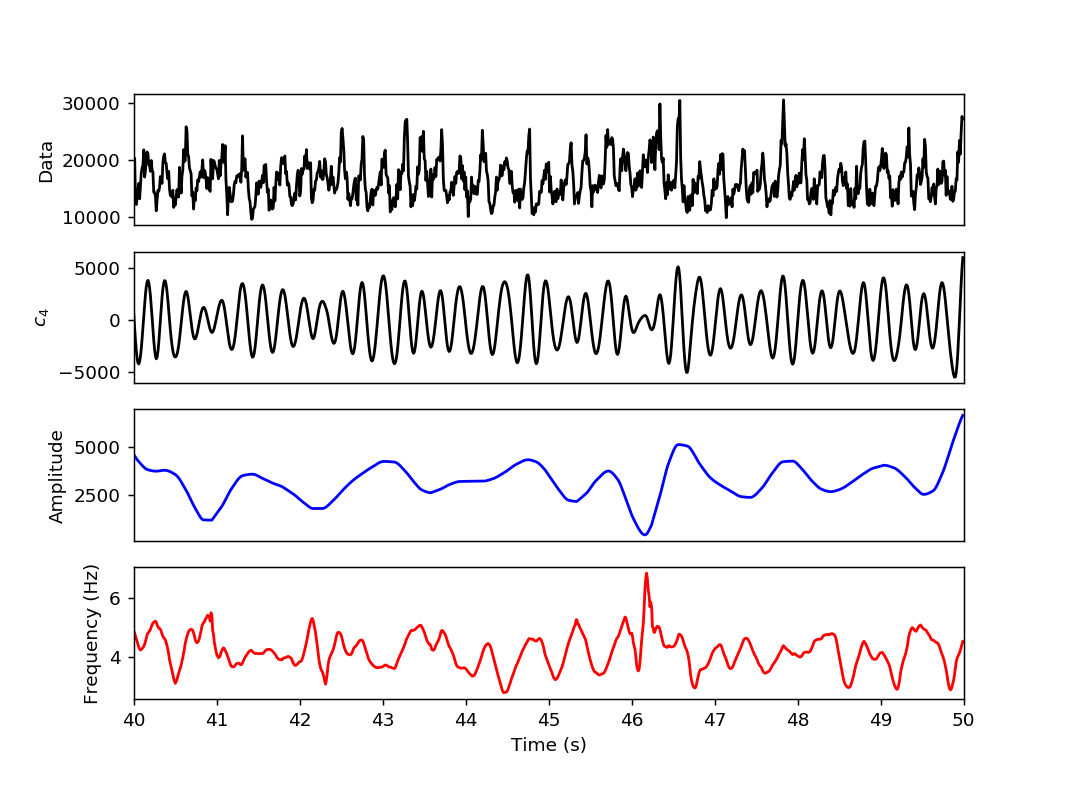

In [5]:
# Plot the IMF C4 and its instantaneous frequency and amplitude
plt.figure()
plt.subplot(411)
plt.plot(time[tstart:tend], rate[tstart:tend], 'k')
plt.xticks([])
plt.xlim([40, 50])
plt.ylabel('Data')
plt.subplot(412)
plt.plot(time[tstart:tend], c4[tstart:tend], 'k')
plt.xticks([])
plt.xlim([40, 50])
plt.ylabel(r'$c_{4}$')
plt.subplot(413)
plt.plot(time[tstart:tend], iamp[tstart:tend], 'b')
plt.xticks([])
plt.xlim([40, 50])
plt.ylabel('Amplitude')
plt.subplot(414)
plt.plot(time[tstart:tend], ifreq[tstart:tend], 'r')
plt.ylabel('Frequency (Hz)')
plt.xticks(np.arange(40,51))
plt.xlim([40, 50])
plt.xlabel('Time (s)')
plt.show()

<IPython.core.display.Javascript object>


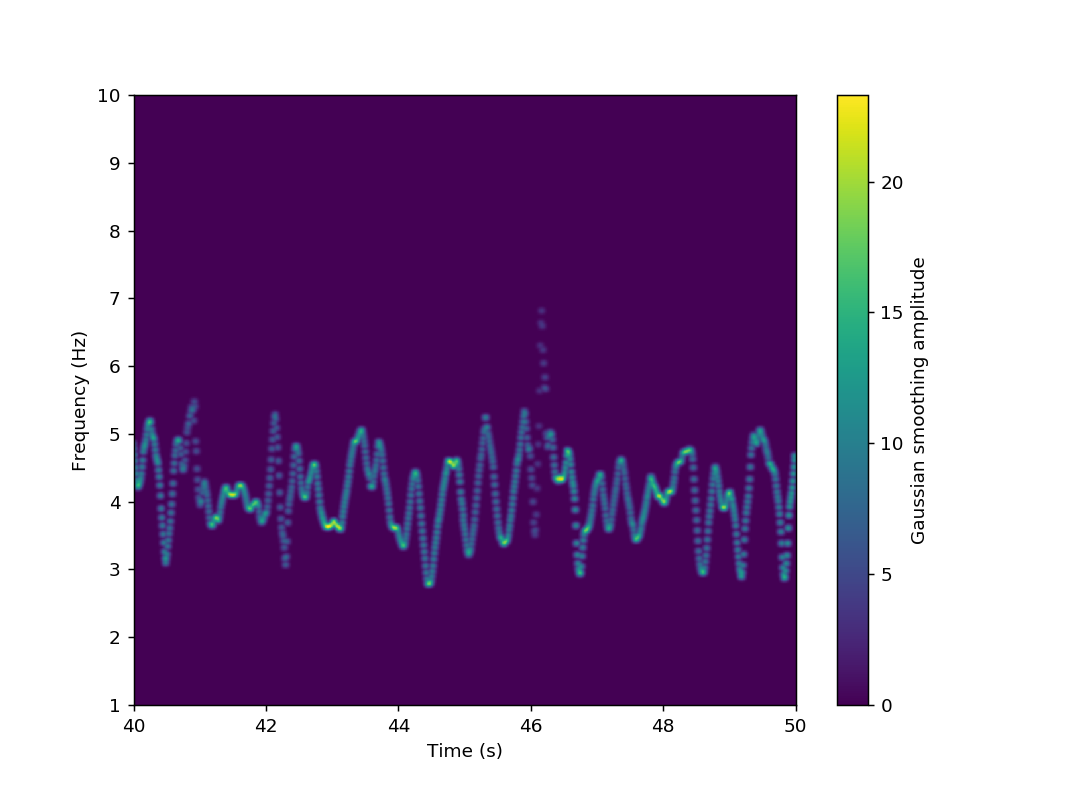

In [6]:
# Plot the Hilbert spectrum 
ifa.plot_hs(time, trange=[40, 50], frange=[1.0, 10], tres=1000, fres=1000, hsize=10, sigma=2, colorbar='amplitude')